In [2]:
import numpy as np
import tensorflow as tf

In [7]:
# 입력 이미지(feature map)
#  (이미지 개수, height, width, channel)
# (1, 4, 4, 1)

image = np.array([[[[13],[20],[30],[0]],
                   [[8],[12],[3],[0]],
                   [[34],[70],[33],[5]],
                   [[111],[80],[10],[23]]]], dtype=np.float32)
print(image.shape)


pooling = tf.nn.max_pool(image, ksize=[1,2,2,1], strides=[1,2,2,1], 
                         padding='VALID')
sess = tf.Session()
result = sess.run(pooling)
print('pooling 결과 : \n{}'.format(result))
print(result.shape)

(1, 4, 4, 1)
pooling 결과 : 
[[[[ 20.]
   [ 30.]]

  [[111.]
   [ 33.]]]]
(1, 2, 2, 1)


In [8]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# 실제 이미지를 이용한 Convolution
- Gray - scale 이미지를 이용해서 Convolution 처리와 pooling 처리

In [9]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img

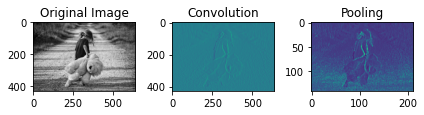

In [28]:
figure = plt.figure()
fig_1 = figure.add_subplot(1,3,1)
fig_2 = figure.add_subplot(1,3,2)
fig_3 = figure.add_subplot(1,3,3)

ori_img = img.imread('../data/img/girl-teddy.jpg')

fig_1.set_title('Original Image')
fig_1.imshow(ori_img)

#Convolution 처리

# 이미지 4차원으로 변환
input_img = ori_img.reshape((1,) + ori_img.shape)
# 채널 하나만 가져오기
channel_1_input_img = input_img[:,:,:,0:1].astype(dtype=np.float32)

# filter (3,3,1,1)
weight = np.array([[[[-1]],[[0]],[[1]]],
                   [[[-1]],[[0]],[[1]]],
                   [[[-1]],[[0]],[[1]]]], dtype=np.float32)
# stride = 1, padding : VALID
sess = tf.Session()
conv2d = tf.nn.conv2d(channel_1_input_img, weight, 
                      strides=[1,1,1,1], padding='VALID')

conv2d_result = sess.run(conv2d)

fig_2.set_title('Convolution')
fig_2.imshow(conv2d_result[0,:,:,:])

# Pooling 처리
# ksize=3, stride=3
pooling = tf.nn.max_pool(conv2d_result, ksize=[1,3,3,1], strides=[1,3,3,1], 
                         padding='VALID')
polling_result = sess.run(pooling)

fig_3.set_title('Pooling')
fig_3.imshow(polling_result[0,:,:,:])

plt.tight_layout()
plt.show()

In [29]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# MNIST

In [30]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img

# 실제 이미지를 이용한 Convolution

(42000, 784)
최종결과 형태 : (1, 13, 13, 4)


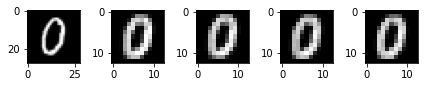

In [51]:
fig = plt.figure()
# sub_plot
fig_list = list()

for i in range(5):
    fig_list.append(fig.add_subplot(1, 5, i+1))
    
# raw data loading
df = pd.read_csv('../data/digit-recognizer/train.csv')

img_data = df.drop('label', axis=1, inplace=False).values
print(img_data.shape)

# 샘플로 사용할 이미지 하나 선택
ori_image = img_data[5:6].reshape(28,28)
fig_list[0].imshow(ori_image, cmap='gray')

# Conv 처리
# 입력이미지 (1, 28, 28, 1)
input_image = ori_image.reshape((1,) + ori_image.shape + (1,)).astype(np.float32)

# filter(kernel) (3, 3, 1, 4)
weight = np.random.rand(3, 3, 1, 4)

# stride : 1 padding : VALID
sess = tf.Session()

conv2d = tf.nn.conv2d(input_image, weight, 
                      strides=[1,1,1,1], padding='VALID')
conv2d_result = sess.run(conv2d)

# ReLU (Rectified Linear Unit)
relu_ = tf.nn.relu(conv2d_result)
relu_result = sess.run(relu_)

# pooling
# ksize = stride = 2
pooling = tf.nn.max_pool(relu_result, ksize=[1, 2, 2, 1], 
                         strides=[1, 2, 2, 1], padding='VALID')
pooling_result = sess.run(pooling)

print('최종결과 형태 : {}'.format(pooling_result.shape))

# for문으로 각 결과 그래프로 그리기
# for i in range(4):
#     fig_list[i+1].imshow(pooling_result[0,:,:,i], cmap='gray')

# 축 변경
i = np.swapaxes(pooling_result, 0,3)
for filter_idx, t_img in enumerate(i):
    fig_list[filter_idx+1].imshow(t_img, cmap='gray')
    
plt.tight_layout()
plt.show()